# Dataset MTCars

### Operações SQL simples

A base **MTCars** https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html já é conhecida, e é bastante utilizada para exemplos de Machine Learning.

Mesmo sendo uma base de dados com 32 linhas e 11 colunas, servirá bem para nosso exemplo de uso de consultas SQL a partir do Spark.

Vamos fazer algumas atividades com o SparkSQL, siga os exemplos.

### Carregando o PySpark

In [1]:
# !pip install pyspark

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

In [3]:
conf = SparkConf().setMaster('local').setAppName('PySpark SQL')
sc = SparkContext.getOrCreate(conf = conf)

Criação do contexto do objeto SparkSQL que será responsável por executar as *query* do Spark com comandos SQL.

In [4]:
sql = SQLContext(sc)

In [5]:
sql

Aqui é a criação de um Dataframe com os dados que estamos lendo do arquivo CSV. Usamos o contexto do SparkSQL, mas ainda sim é um Dataframe

In [8]:
dadosSpark = sql.read.format("csv").options(header='true').load('Data/mtcars.csv')

In [9]:
dadosSpark.take(5)

[Row(model='Mazda RX4', mpg='21', cyl='6', disp='160', hp='110', drat='3.9', wt='2.62', qsec='16.46', vs='0', am='1', gear='4', carb='4'),
 Row(model='Mazda RX4 Wag', mpg='21', cyl='6', disp='160', hp='110', drat='3.9', wt='2.875', qsec='17.02', vs='0', am='1', gear='4', carb='4'),
 Row(model='Datsun 710', mpg='22.8', cyl='4', disp='108', hp='93', drat='3.85', wt='2.32', qsec='18.61', vs='1', am='1', gear='4', carb='1'),
 Row(model='Hornet 4 Drive', mpg='21.4', cyl='6', disp='258', hp='110', drat='3.08', wt='3.215', qsec='19.44', vs='1', am='0', gear='3', carb='1'),
 Row(model='Hornet Sportabout', mpg='18.7', cyl='8', disp='360', hp='175', drat='3.15', wt='3.44', qsec='17.02', vs='0', am='0', gear='3', carb='2')]

In [10]:
dadosSpark.printSchema()

root
 |-- model: string (nullable = true)
 |-- mpg: string (nullable = true)
 |-- cyl: string (nullable = true)
 |-- disp: string (nullable = true)
 |-- hp: string (nullable = true)
 |-- drat: string (nullable = true)
 |-- wt: string (nullable = true)
 |-- qsec: string (nullable = true)
 |-- vs: string (nullable = true)
 |-- am: string (nullable = true)
 |-- gear: string (nullable = true)
 |-- carb: string (nullable = true)



In [11]:
dadosSpark.select("model").show()

+-------------------+
|              model|
+-------------------+
|          Mazda RX4|
|      Mazda RX4 Wag|
|         Datsun 710|
|     Hornet 4 Drive|
|  Hornet Sportabout|
|            Valiant|
|         Duster 360|
|          Merc 240D|
|           Merc 230|
|           Merc 280|
|          Merc 280C|
|         Merc 450SE|
|         Merc 450SL|
|        Merc 450SLC|
| Cadillac Fleetwood|
|Lincoln Continental|
|  Chrysler Imperial|
|           Fiat 128|
|        Honda Civic|
|     Toyota Corolla|
+-------------------+
only showing top 20 rows



A partir do dataframe **dadosSpark**, vamos registrar uma tabela temporária do SQL, chamada **Carros**

In [12]:
dadosSpark.registerTempTable("carros")

A partir do motor do **SparkSQL** vamos escrever uma *query* em SQL que retornará todas as linhas e colunas da nossa base

In [13]:
sql.sql("select count(0) from carros").show(1)

+--------+
|count(0)|
+--------+
|      32|
+--------+



In [14]:
sql.sql("select * from carros").show(32)

+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|              model| mpg|cyl| disp| hp|drat|   wt| qsec| vs| am|gear|carb|
+-------------------+----+---+-----+---+----+-----+-----+---+---+----+----+
|          Mazda RX4|  21|  6|  160|110| 3.9| 2.62|16.46|  0|  1|   4|   4|
|      Mazda RX4 Wag|  21|  6|  160|110| 3.9|2.875|17.02|  0|  1|   4|   4|
|         Datsun 710|22.8|  4|  108| 93|3.85| 2.32|18.61|  1|  1|   4|   1|
|     Hornet 4 Drive|21.4|  6|  258|110|3.08|3.215|19.44|  1|  0|   3|   1|
|  Hornet Sportabout|18.7|  8|  360|175|3.15| 3.44|17.02|  0|  0|   3|   2|
|            Valiant|18.1|  6|  225|105|2.76| 3.46|20.22|  1|  0|   3|   1|
|         Duster 360|14.3|  8|  360|245|3.21| 3.57|15.84|  0|  0|   3|   4|
|          Merc 240D|24.4|  4|146.7| 62|3.69| 3.19|   20|  1|  0|   4|   2|
|           Merc 230|22.8|  4|140.8| 95|3.92| 3.15| 22.9|  1|  0|   4|   2|
|           Merc 280|19.2|  6|167.6|123|3.92| 3.44| 18.3|  1|  0|   4|   4|
|          M

In [15]:
sql.sql("select cyl AS Cilindros, \
                round(avg(wt),2) AS PesoMedio \
         from carros group by cyl ").show()

+---------+---------+
|Cilindros|PesoMedio|
+---------+---------+
|        8|      4.0|
|        6|     3.12|
|        4|     2.29|
+---------+---------+



In [21]:
sql.sql("SELECT model FROM carros ORDER BY qsec DESC").show()

+-------------------+
|              model|
+-------------------+
|           Merc 230|
|            Valiant|
|      Toyota Corona|
|          Merc 240D|
|     Toyota Corolla|
|           Fiat 128|
|     Hornet 4 Drive|
|          Fiat X1-9|
|          Merc 280C|
|         Datsun 710|
|         Volvo 142E|
|        Honda Civic|
|           Merc 280|
|        Merc 450SLC|
| Cadillac Fleetwood|
|Lincoln Continental|
|         Merc 450SL|
|  Chrysler Imperial|
|         Merc 450SE|
|        AMC Javelin|
+-------------------+
only showing top 20 rows



E é possível converter em Dataframe e depois gerar visualizações com os dados

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dados = sql.sql("select int(gear), float(wt), float(mpg) from carros")
df = dados.toPandas() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
gear    32 non-null int32
wt      32 non-null float32
mpg     32 non-null float32
dtypes: float32(2), int32(1)
memory usage: 512.0 bytes


Text(0, 0.5, 'Milhas por Galão')

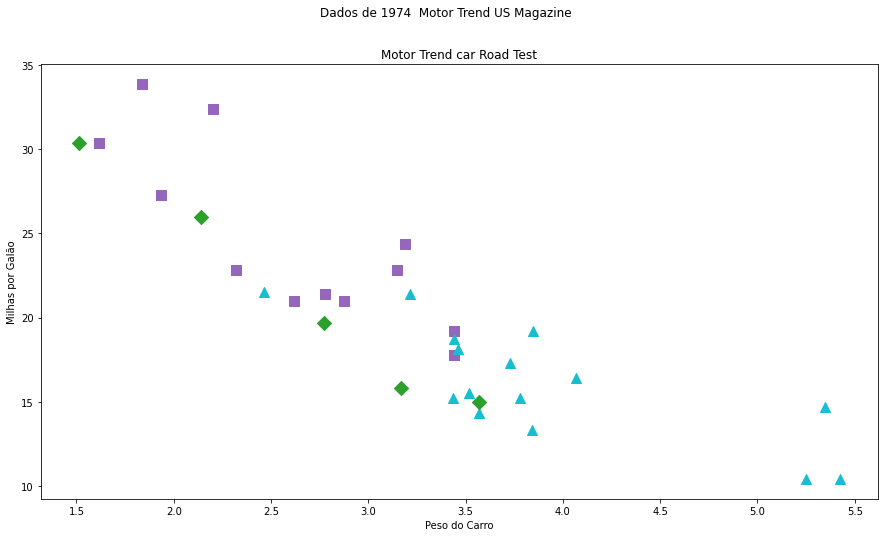

In [24]:
plt.figure(figsize=(15,8))

cores = {3:'tab:cyan',4:'tab:purple',5:'tab:green'}
marcadores = {3:'^',4:'s',5:'D'}

for cambio in df['gear'].unique():
    tmp = df[df['gear'] == cambio]
    plt.scatter(tmp['wt'], tmp['mpg'], color=cores[cambio], marker=marcadores[cambio], s=100)

plt.title("Motor Trend car Road Test")
plt.suptitle("Dados de 1974  Motor Trend US Magazine")
plt.xlabel("Peso do Carro")
plt.ylabel( "Milhas por Galão")